In [16]:
import cv2
import os 
import face_alignment
import numpy as np 
import os 
import matplotlib.pyplot as plt

In [54]:
image_folder = "datasets/large/B"
image_paths = np.sort(np.array([image_folder + "/" + i for i in os.listdir(image_folder)]))
len(image_paths)

143

In [55]:
im = cv2.imread(image_paths[0])

In [56]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)


In [57]:
preds.shape


(68, 2)

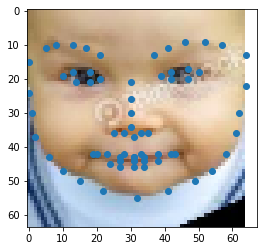

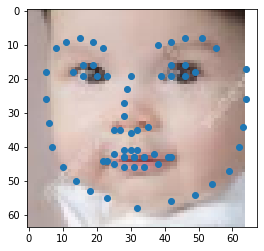

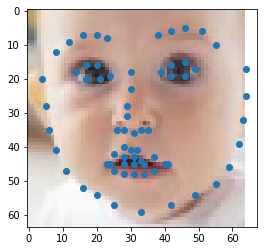

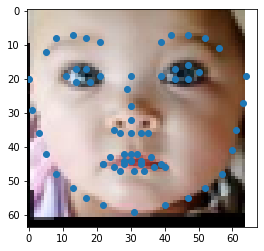

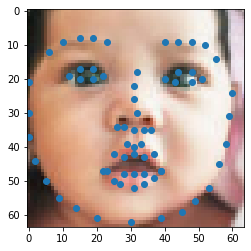

In [58]:
for i in range(5):
    im = cv2.resize(cv2.imread(image_paths[i]), (64,64))
    preds = fa.get_landmarks(im)[0]

    x = preds[:,0]
    y = preds[:,1]
#     print(preds.shape)

    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.scatter(x,y)
    plt.show()

In [52]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)

def find_landmarks(image_np):
    preds = fa.get_landmarks(image_np)[0]
    x = preds[:,0]
    y = preds[:,1]
    
    d = {
        "x": x,
        "y": y
    }
    return d

No face at:  datasets/large/B/1_0_0_20170109193052283.jpg.chip.jpg


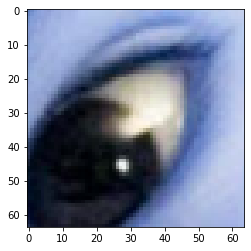

No face at:  datasets/large/B/1_0_0_20170109194120301.jpg.chip.jpg


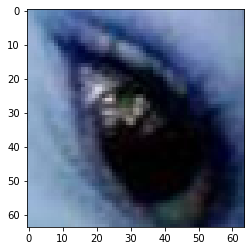

In [61]:
bad_files = []
for i in range(len(image_paths)):
    im = cv2.resize(cv2.imread(image_paths[i]), (64,64))
    try:
        l = find_landmarks(im)
    except:
        print("No face at: ", image_paths[i] )
        bad_files.append(image_paths[i])
        plt.imshow(im)
        plt.show()

In [63]:
for file in bad_files:
    os.remove(file)
    print("removed :", file)

removed : datasets/large/B/1_0_0_20170109193052283.jpg.chip.jpg
removed : datasets/large/B/1_0_0_20170109194120301.jpg.chip.jpg
